# KNN 이진분류 (Citrus 데이터셋)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 준비

In [ ]:
# !wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/citrus.csv

--2024-12-30 03:01:33--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/citrus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308294 (301K) [text/plain]
Saving to: ‘citrus.csv’

citrus.csv          100%[===================>] 301.07K  --.-KB/s    in 0.01s   

2024-12-30 03:01:33 (19.8 MB/s) - ‘citrus.csv’ saved [308294/308294]



In [ ]:
df = pd.read_csv('citrus.csv')
df.shape

(10000, 6)

In [ ]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


## 2. 전체 정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


### 범주형 변수

In [ ]:
# 오렌지와 그레이프 후르츠 개수 확인
df['name'].value_counts()

,count
name,
orange,5000
grapefruit,5000


### 연속형 변수

In [ ]:
# 오렌지 데이터만 추출
df_orange = df[df['name'] == 'orange']
# df_orange = df.loc[df['name']=='orange',:]
df_orange.shape

(5000, 6)

In [ ]:
# 자몽 데이터만 추출
df_grapefruit = df[df['name'] == 'grapefruit']
# df_orange = df.loc[df['name']=='orange',:]
df_grapefruit.shape

(5000, 6)

<Axes: xlabel='weight', ylabel='Count'>

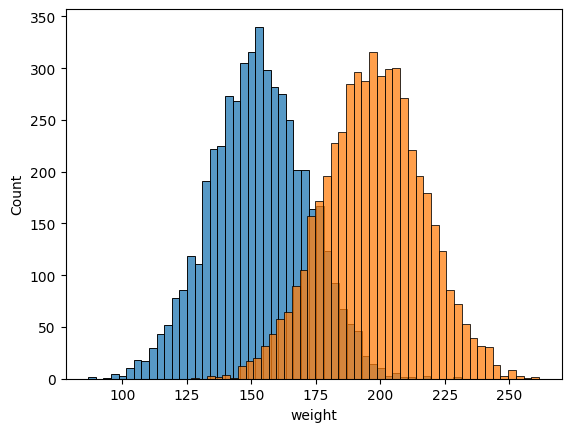

In [ ]:
# 시각화

sns.histplot(data=df_orange, x = 'weight')
sns.histplot(data=df_grapefruit, x = 'weight')

## 3. 결측치

In [ ]:
df.isna().sum()

,0
name,0
diameter,0
weight,0
red,0
green,0
blue,0


<Axes: >

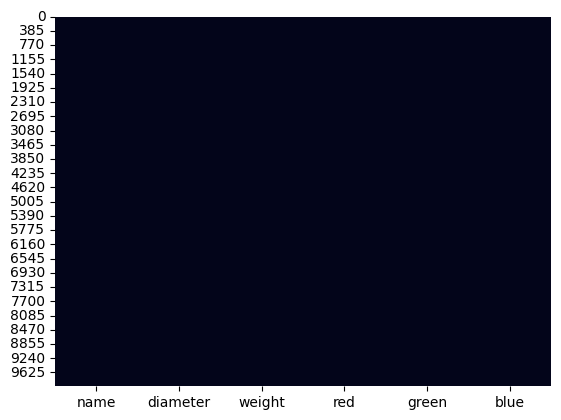

In [ ]:
sns.heatmap(df.isna(), cbar=False) # 결측치 없음

In [ ]:
# 이상치, 중복치 확인

## 4. 데이터 분리
- 학습용, 검증용, 테스트용 데이터 분리

In [ ]:
df.head(20)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
5,orange,4.59,95.86,142,100,2
6,orange,4.64,97.94,156,85,2
7,orange,4.65,98.50,142,74,2
8,orange,4.68,100.20,159,90,16
9,orange,4.69,100.31,161,76,6


In [ ]:
# 데이터 셔플
df = df.sample(frac=1)

In [ ]:
df.head(20)

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2
6340,grapefruit,10.73,185.35,167,56,19
576,orange,6.96,130.97,152,85,2
5202,grapefruit,9.34,163.22,163,85,24
6363,grapefruit,10.75,185.61,129,62,2
439,orange,6.78,127.42,171,93,4


In [ ]:
idx_train = int(len(df)*0.6)
idx_val = int(len(df)*0.8)
idx_train, idx_val

(6000, 8000)

In [ ]:
train = df.iloc[:idx_train,:]
val = df.iloc[idx_train:idx_val,:]
test = df.iloc[idx_val:,:]

In [ ]:
train.shape, val.shape, test.shape

((6000, 6), (2000, 6), (2000, 6))

### x, y 데이터 분리

In [ ]:
train.head()
# y = name, x = 나머지 col

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2


In [ ]:
train.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [ ]:
x_train = train.drop('name', axis=1) # 이름 (y) 제외 나머지
y_train = train['name'] # 이름(y)만
x_val = val.drop('name', axis=1)
y_val = val['name']

In [ ]:
x_train.head()

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2


In [ ]:
y_train.head()

,name
6252,grapefruit
4684,orange
1731,orange
4742,orange
4521,orange


### 스케일링

In [ ]:
u = x_train.mean()
s = x_train.std()

In [ ]:
u, s

(diameter      9.933560
 weight      174.427638
 red         154.088833
 green        76.107500
 blue         11.222500
 dtype: float64,
 diameter     1.948931
 weight      29.212149
 red         10.459948
 green       11.788162
 blue         9.014315
 dtype: float64)

In [ ]:
x_train_s = (x_train-u)/s
x_train_s

,diameter,weight,red,green,blue
6252,0.372738,0.340350,1.138741,-1.366413,0.751860
4684,0.239331,0.236626,1.138741,2.790299,0.197186
1731,-0.997244,-0.991972,-0.390904,-0.348443,-1.023095
4742,0.316296,0.293110,-0.295301,0.669528,-1.023095
4521,0.085401,0.098670,0.565124,-0.348443,-1.023095
...,...,...,...,...,...
7895,0.906364,0.923669,1.043138,-2.045060,-1.023095
9590,1.676016,1.690816,0.087110,-0.178781,0.308121
7288,0.706254,0.717248,1.043138,-0.263612,1.639337
278,-1.772028,-1.762542,2.190371,0.584697,-0.912160


In [ ]:
x_val_s = (x_val-u)/s
x_val_s

,diameter,weight,red,green,blue
2480,-0.756086,-0.751661,-0.390904,-0.009119,-0.801226
289,-1.756635,-1.753299,-0.104095,0.160542,-0.135618
6086,0.306034,0.266408,-1.538137,-1.536075,0.973729
3075,-0.561108,-0.558933,0.851932,2.281314,0.308121
8123,0.988460,1.001377,-0.773315,-1.366413,0.862794
...,...,...,...,...,...
1638,-1.033161,-1.025178,-1.155726,0.584697,-0.468422
5891,0.213676,0.176377,1.138741,1.517836,0.751860
7427,0.752433,0.762777,-1.633740,-2.299553,0.751860
608,-1.505215,-1.470882,0.278316,1.093682,-1.023095


In [ ]:
label_dic = {'grapefruit':0, 'orange': 1}
y_train_e = y_train.map(label_dic)
y_val_e = y_val.map(label_dic)

## 5. 학습

In [ ]:
type(x_train_s), type(y_train_e), type(x_val_s), type(y_val_e)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [ ]:
# numpy array
x_train_s = x_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()
x_val_s = x_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

In [ ]:
x_train_s.shape, y_train_e.shape, x_val_s.shape, y_val_e.shape

((6000, 5), (6000,), (2000, 5), (2000,))

### 베이스 모델

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_s, y_train_e) # 학습

KNeighborsClassifier()

## 검증

In [ ]:
y_pred = clf.predict(x_val_s)
y_pred[:20]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
y_val_e[:20]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
sum(y_pred==y_val_e)/len(y_val_e) # 정확도

0.9235

In [ ]:
for i in range(5, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_s, y_train_e)
    y_pred = clf.predict(x_val_s)
    acc = sum(y_pred==y_val_e)/len(y_val_e) # 정확도
    print(f'k={i}, acc= {acc}')

k=5, acc= 0.9235
k=6, acc= 0.918
k=7, acc= 0.9215
k=8, acc= 0.9225
k=9, acc= 0.9235
k=10, acc= 0.925
k=11, acc= 0.926
k=12, acc= 0.9265
k=13, acc= 0.9255
k=14, acc= 0.9275
k=15, acc= 0.927
k=16, acc= 0.9265
k=17, acc= 0.926
k=18, acc= 0.9255
k=19, acc= 0.926
k=20, acc= 0.9255
k=21, acc= 0.9255
k=22, acc= 0.9255
k=23, acc= 0.925
k=24, acc= 0.925
k=25, acc= 0.9245
k=26, acc= 0.925
k=27, acc= 0.9255
k=28, acc= 0.9265
k=29, acc= 0.925


### 베스트 모델

In [ ]:
# k = 15
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(x_train_s, y_train_e)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
acc = sum(y_pred==y_val_e)/len(y_val_e) # 정확도
print(acc)

0.925


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_val_e, y_pred)
confusion_matrix # 오른쪽 대각선 -> 정답, 왼쪽 대각선 -> 틀린 값

array([[957,  85],
       [ 65, 893]])

Text(50.722222222222214, 0.5, 'Actual')

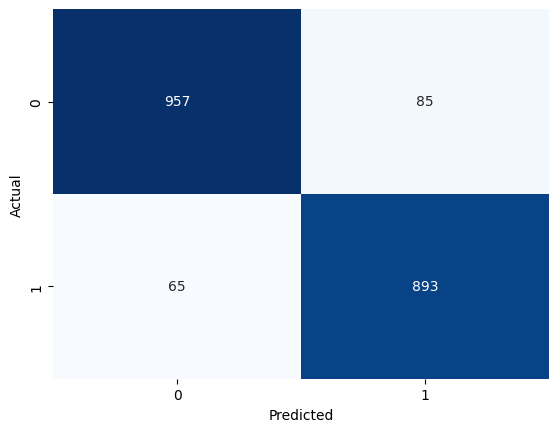

In [ ]:
s = sns.heatmap(confusion_matrix, cmap = 'Blues', annot=True, fmt = 'd',cbar=False)
s.set_xlabel('Predicted')
s.set_ylabel('Actual')

## 6. 테스트


In [ ]:
test.head()

,name,diameter,weight,red,green,blue
399,orange,6.70,126.50,168,80,3
7247,grapefruit,11.29,194.97,151,65,14
6406,grapefruit,10.77,186.32,158,72,19
882,orange,7.31,135.44,148,87,7
3565,orange,9.16,163.25,172,81,2


### x,y 분리

In [ ]:
x_test = test.drop('name', axis=1)
y_test = test['name']

In [ ]:
x_test.shape, y_test.shape

((2000, 5), (2000,))

### 스케일링

In [ ]:
s = x_train.std()

x_test_s = (x_test - u) / s
y_test_e = y_test.map(label_dic)

In [ ]:
# to_numpy()
x_test_s = x_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

In [ ]:
type(x_test_s), type(y_test_e)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_test_s.shape, y_test_e.shape

((2000, 5), (2000,))

### 예측

In [ ]:
# 예측
y_pred = clf.predict(x_test_s)

In [ ]:
acc = sum(y_pred==y_test_e)/len(y_test_e) # 정확도
print(acc)

0.9275


## 성능평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  confusion_matrix = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(confusion_matrix, cmap = 'Blues', annot=True, fmt = 'd',cbar=False)
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

In [ ]:
print_metrics(y_test_e, y_pred)

acc: 0.9275, prec: 0.9256, recall: 0.9265, f1: 0.9261


UnboundLocalError: local variable 'confusion_matrix' referenced before assignment